In [ ]:
scripts_dir = file.path(dirname(getwd()), 'resources/')
source(file.path(scripts_dir, 'utils.r'))
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)
library(ggbeeswarm)


In [2]:
# all of my analysis notebook files have the same metadata 
# and config file loading like this

# load the metadata and the config file with the 
# absolute paths for the correct system 
config = load_config_abs(scripts_dir)
meta_df = load_meta(scripts_dir)

[1] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/processing/map/../../metadata/metadata_fmt.tsv"


New names:
• `` -> `...1`
Rows: 187 Columns: 72
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (32): file_id, File format, File type, Output type, exp_id, Assay, donor...
dbl  (4): ...1, Biological replicate(s), Size, age_mr
lgl (36): File format type, File assembly, Biosample treatments, Biosample t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
## now down here, whatever analysis

In [5]:
# i (chatgpt) reimplemented a simple version of snakemake expand

## Look at adapter content for a specific sample
sample = meta_df$sample[1]
fname = expand(config$lr$porechop$qc$nanoplot_stats,
               sample=c(sample))
print(sample)
print(fname)

[1] "ENCSR063MJL"
[1] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR063MJL/NanoStats.txt"


In [7]:
df = read.table(fname, sep='\t')

In [8]:
head(df)

,V1
,<chr>
1,General summary:
2,"Mean read length: 1,079.4"
3,Mean read quality: 11.4
4,Median read length: 818.0
5,Median read quality: 12.1
6,"Number of reads: 3,498,920.0"


In [17]:
## now, we can look at all samples like this: 
files = expand(config$lr$porechop$qc$nanoplot_stats,
               sample=meta_df$sample)
head(files, 5)

get_num_reads <- function(file) {
  lines <- read_lines(file)
  line <- lines[str_detect(lines, "Number of reads")]
  if(length(line) == 0) return(NA_real_)
  
  num <- str_extract(line, "[\\d,]+") %>% 
    str_remove_all(",") %>% 
    as.numeric()
  return(num)
}

# Assuming files and meta_df$sample align 1-to-1
df_reads <- tibble(
  sample = meta_df$sample,
  file = files,
  num_reads = sapply(files, get_num_reads)
)

[1] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR063MJL/NanoStats.txt"
[2] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR348TSX/NanoStats.txt"
[3] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR213OVS/NanoStats.txt"
[4] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR228HRA/NanoStats.txt"
[5] "/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR270XWF/NanoStats.txt"

In [27]:
df_reads$x = 1

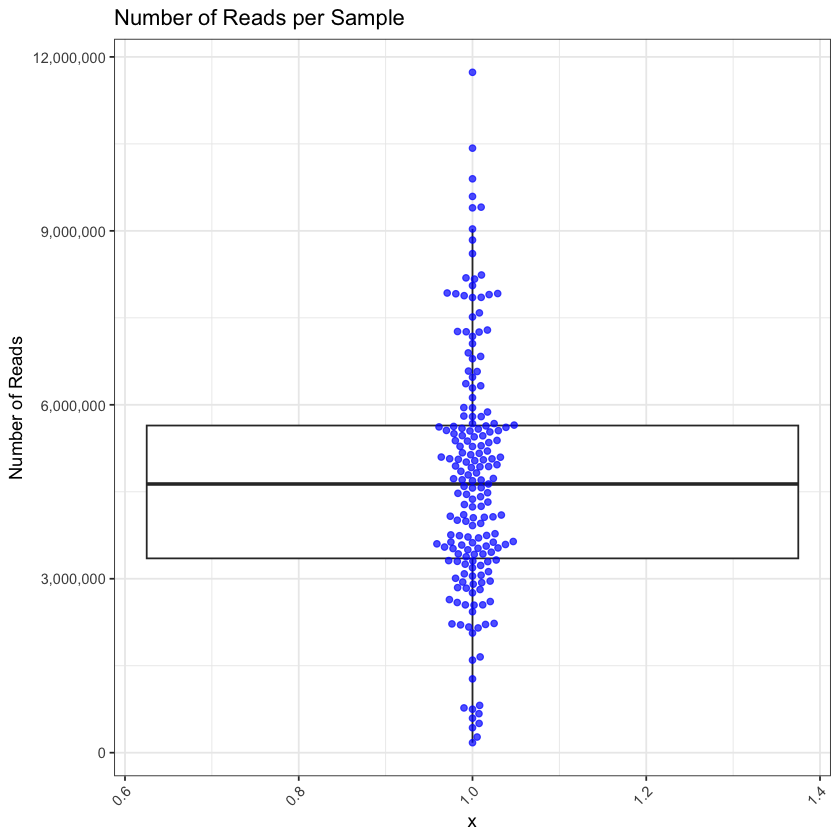

In [29]:
ggplot(df_reads, aes(x=x, y = num_reads)) +
  geom_boxplot(outlier.shape = NA) +
  geom_beeswarm(color = "blue", size = 1.5, alpha = 0.7) +
  theme_bw() +
  labs(title = "Number of Reads per Sample",
       y = "Number of Reads") +
  scale_y_continuous(labels = scales::comma)
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



In [30]:
# low read depth samples
df_reads[df_reads$num_reads < 1e6, ]


sample,file,num_reads,x
<chr>,<chr>,<dbl>,<dbl>
ENCSR227LUE,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR227LUE/NanoStats.txt,504949,1
ENCSR979UPD,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR979UPD/NanoStats.txt,594898,1
ENCSR325LUL,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR325LUL/NanoStats.txt,750060,1
ENCSR222RWQ,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR222RWQ/NanoStats.txt,672394,1
ENCSR194VUL,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR194VUL/NanoStats.txt,815720,1
ENCSR071XIZ,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR071XIZ/NanoStats.txt,429728,1
ENCSR186JQU,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR186JQU/NanoStats.txt,270215,1
ENCSR683JMZ,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR683JMZ/NanoStats.txt,172086,1
ENCSR085CHJ,/Users/fairliereese/Documents/programming/mele_lab/projects/240927_stam_lr/data/porechop/nanoplot/ENCSR085CHJ/NanoStats.txt,772038,1
